<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_01_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 01 - Multi-layer Perceptron (MLP)

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 1 – REDE MLP

1. Selecionar dois datasets (não triviais)

  * Um dataset para classificação
  * Um dataset para regressão
  * Separar em treino/validação/teste

2. Treinar modelos MLP para os dois problemas

3. Considerar:

  * Diferentes topologias (>=5 topologias, variar número de
camadas

  * Usar o algoritmo original SGD (não usar algoritmos otimizados,
e.g. ADAM)
  
  * Avaliar o impacto do uso do Momentum

  * Avaliar o impacto do uso da regularização (i.e. L2)
  
  * [EXTRA] Avaliar o impacto do Dropout

4. Ilustrar graficamente a evolução do treinamento (treino/validação).

5. Confeccionar um relatório (reprodutível) contendo os
experimentos e resultados



# Introduction 

This Jupyter notebook aims to study how sensitive an MPL network is to different topologies and different regularization values L2, Momentum, and additionally dropout in regression and a classification problem.

For this regression problem, I decided to choose observational cosmology data where they are downloaded directly from the collaboration site, and in the dataset part, I left a small reference explaining how the acquisition of the two-point correlation is performed and for the classification problem I chose to choose an already used dataset because it would have some parameter about the precision of my model.


All Experiments here are 100% reproducible because the data are directly accessed from where the data are stored. For the classification problem, you need to configure your google drive to directly download datasets from Kaggle. The tutorial explaining this is in the References section and commented on the download data cell.

All MLPs draws was maded at http://alexlenail.me/NN-SVG/index.html

# Metodology

We will explore the impact of several hyperparameters is keras tensorflow model. We will explore 5 topologys. For each one of the we will variete:

* Regularization 
* Dropout 
* Momentum 


That will give us 6 experiments for each topology totaling 60 experiments. 30 for regularization and 30 for classfications

For each kind of problem we will get a genertal discution in the and. 

In [2]:
#Importing Librarys 📚
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import time # for time mesurment
import tensorflow as tf
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from IPython.display import HTML

print(tf.__version__)

2.8.2


# Regression

The regression problem consists of searching for a "mathematical expression" whose function $f(x)$ can describe a given set of data. This technique is used when you have the points of a certain measure but not the law that describes that phenomenon.

In general, any curve can be associated with a set of nth-order polynomials or a set of straight lines. For the case of a neural network, the non-linearity of how the weights influence a given function is difficult to describe, however it has the generalization capacity similar to linear regression.

Below we can see an example of points being fitted by a curve according to the training epochs.

<img src="https://www.cs.toronto.edu/~frossard/post/multiple_linear_regression/multiple_lreg.gif" width=500>

font: https://www.cs.toronto.edu/~frossard/post/multiple_linear_regression/


Here I will present 5 topologies of a Multilayer Perceptron, gradually increasing the number of neurons and number of layers. For each topology I will change the hyperparameters of "momentun", "regularization" and "droup out. Having a total of 6 variations.

* No Regularization, no Dropoutr, no Momentun.
* 0.2 Regularization, no Dropout, no Momentun.
* No Regularization, 0.2 Dropout, no Momentun.
* No Regularization, no Dropoutr, 0.2 Momentun.
* 0.2 Regularization, without Dropoutr, 0.2 Momentun.
* 0.2 Regularization, 0.2 Dropoutr, 0.2 Momentun.

The activation functions are the same in all topologies with the exception of topology 5 which follows the same structure as topology 4.

In this way, we can observe how the regularization is sensitive to these hyperparameters.

## Dataset

This dataset refers to the Power Spectrum Desity Function (PSD) of the two-point correlation function of the Cosmic Background Radiation and is of great importance for the determination of the cosmological parameters. This data carry the information of how matter are splitet in the larg scale universe. 

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/Sound%20waves%20in%20space%20Baryon%20Acoustic%20Oscillations.gif?raw=true"> 

font: https://youtu.be/jpXuYc-wzk4

This data set can be found at 
http://pla.esac.esa.int/pla/#cosmology


In [3]:
!wget "http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt"

--2022-08-02 18:29:10--  http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [application/x-binary]
Saving to: ‘product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt.1’

product-action?COSM     [    <=>             ] 166.55K   226KB/s    in 0.7s    

2022-08-02 18:29:12 (226 KB/s) - ‘product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt.1’ saved [170547]



In [4]:
df = pd.read_fwf('product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt')
df.columns = ["id","l", "Dl", "+dDl", "-dDl"]
df.drop('id', axis=1, inplace=True) #droping id Column

In [5]:
#Normalize data
df.l =  (df.l - df.l.mean()) / df.l.std()
df.Dl =  (df.Dl - df.Dl.mean()) / df.Dl.std()
df['+dDl'] =  (df['+dDl'] - df['+dDl'].mean()) / df['+dDl'].std()
df['+dDl'] =  (df['-dDl'] - df['-dDl'].mean()) / df['-dDl'].std()

$$ D_l = \frac{l(l+1)Cl}{(2\pi)} $$

[]

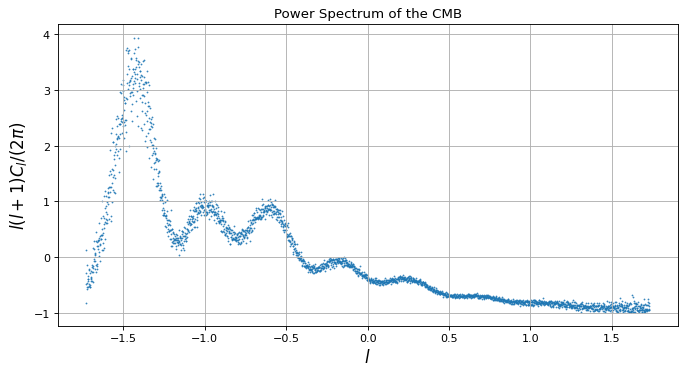

In [6]:
figure(figsize=(10,5),dpi=80)
plt.scatter(df.l,df.Dl,s=0.3)
#plt.errorbar(l, Dl, df.min_error, df.max_error, fmt='r^')
#plt.xscale('log')
plt.xlabel(r'$l$',size=15)
plt.ylabel(r'$l(l+1)C_l/(2\pi)$',size=15)
plt.title("Power Spectrum of the CMB")
plt.grid()
plt.plot()


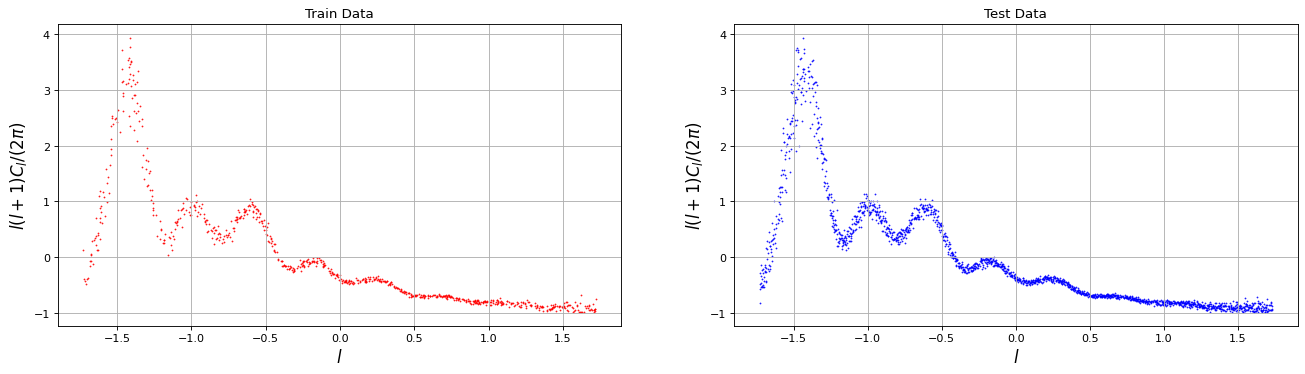

In [7]:
# Spliting in traing and Validation 
x_train, x_test, y_train, y_test = train_test_split(df.l, df.Dl, test_size=0.7)
# print(len(x_train))
# print(len(x_test))
figure(figsize=(20,5),dpi=80)

plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='red',s=0.3)
plt.title('Train Data')
plt.xlabel(r'$l$',size=15)
plt.ylabel(r'$l(l+1)C_l/(2\pi)$',size=15)
plt.grid()
#plt.xscale('log')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='blue',s=0.3)
plt.title('Test Data')
plt.xlabel(r'$l$',size=15)
plt.ylabel(r'$l(l+1)C_l/(2\pi)$',size=15)
plt.grid()
#plt.xscale('log')
plt.show()


## Comun parametes

In [8]:
#Paramentes
adam = tf.keras.optimizers.Adam()

## Topology 1

To attempt to build a network capable of finding a regression law for these problems, we will generate 5 different network topologies. The first will be the simple and classic case of a perceptron and the second will increase the number of layers and the number of neurons.

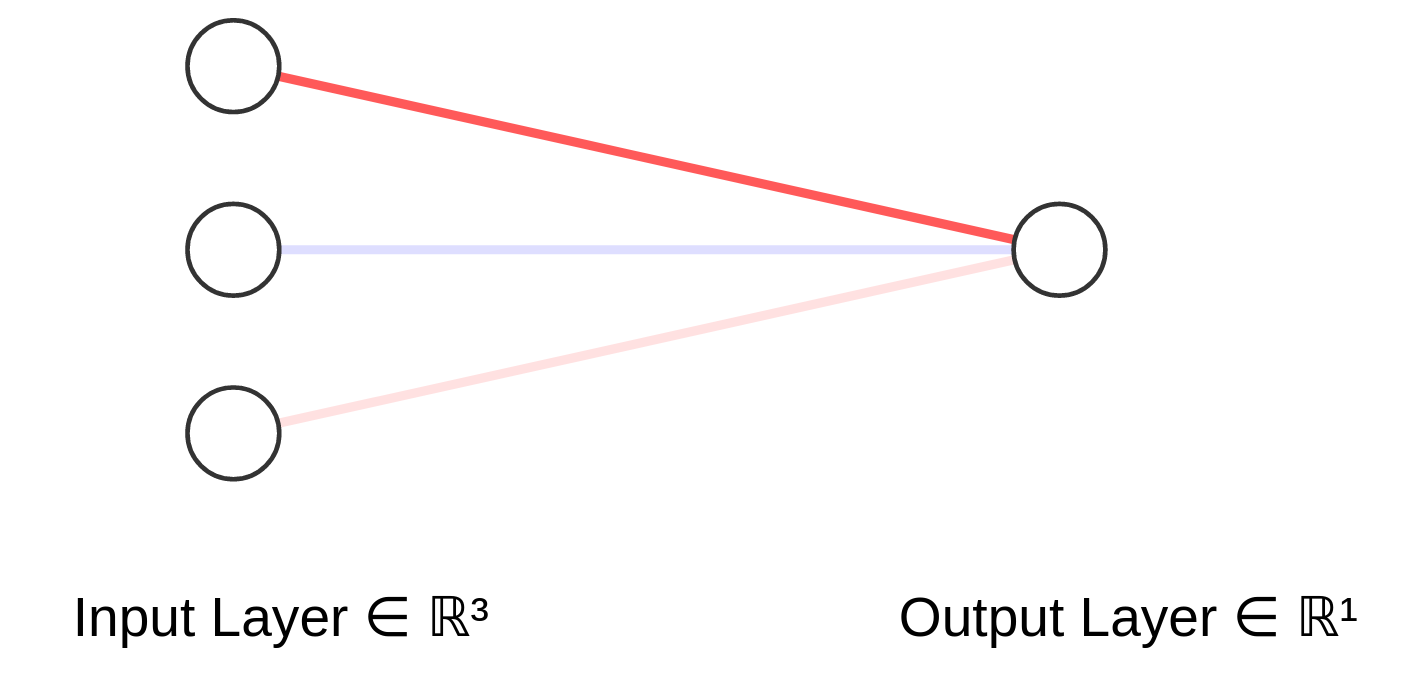

### Models

In [9]:
model_1 = []
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]

for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_1.append(keras.Sequential())
  model_1[i].add(keras.layers.Dense(units=3,kernel_regularizer=l2(regul[i]), input_shape=[1], activation="tanh"))
  model_1[i].add(Dropout(dropo[i]))
  model_1[i].add(keras.layers.Dense(units=1,kernel_regularizer=l2(regul[i]), activation="linear"))
  model_1[i].compile(loss='mean_squared_error', optimizer=sgd, metrics=["mean_absolute_error"])

### Training

In [10]:
#O que é isso?
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
ages = 1000
#Traing Model_11
start___1 = []
endti___1 = []
history_1 = []
for i in range(len(regul)):
  start___1.append(time.time())
  history_1.append(
    model_1[i].fit(x_train, y_train, epochs=ages, batch_size=10, validation_split=0.2, verbose=1))#, 
  endti___1.append(time.time())

A saída de streaming foi truncada nas últimas 5000 linhas.
61/61 [==============================] - 0s 4ms/step - loss: 0.2729 - mean_absolute_error: 0.2786 - val_loss: 0.3404 - val_mean_absolute_error: 0.2782
Epoch 502/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.2730 - mean_absolute_error: 0.2790 - val_loss: 0.3429 - val_mean_absolute_error: 0.2795
Epoch 503/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.2726 - mean_absolute_error: 0.2805 - val_loss: 0.3409 - val_mean_absolute_error: 0.2781
Epoch 504/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.2721 - mean_absolute_error: 0.2803 - val_loss: 0.3373 - val_mean_absolute_error: 0.2776
Epoch 505/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.2730 - mean_absolute_error: 0.2765 - val_loss: 0.3399 - val_mean_absolute_error: 0.2783
Epoch 506/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.2719 - mean_absolute_error: 0.2781 - val_loss: 0

### Results

In [11]:
#Time Running Out
for i in range(len(start___1)):
  print(round((    endti___1[i]- start___1[i])/60,5),'minuts')
print(round((      endti___1[-1]-start___1[0])/60,5),'minuts TOTAL')

3.37377 minuts
4.37284 minuts
4.37557 minuts
5.37641 minuts
4.37656 minuts
4.37783 minuts
26.25299 minuts TOTAL


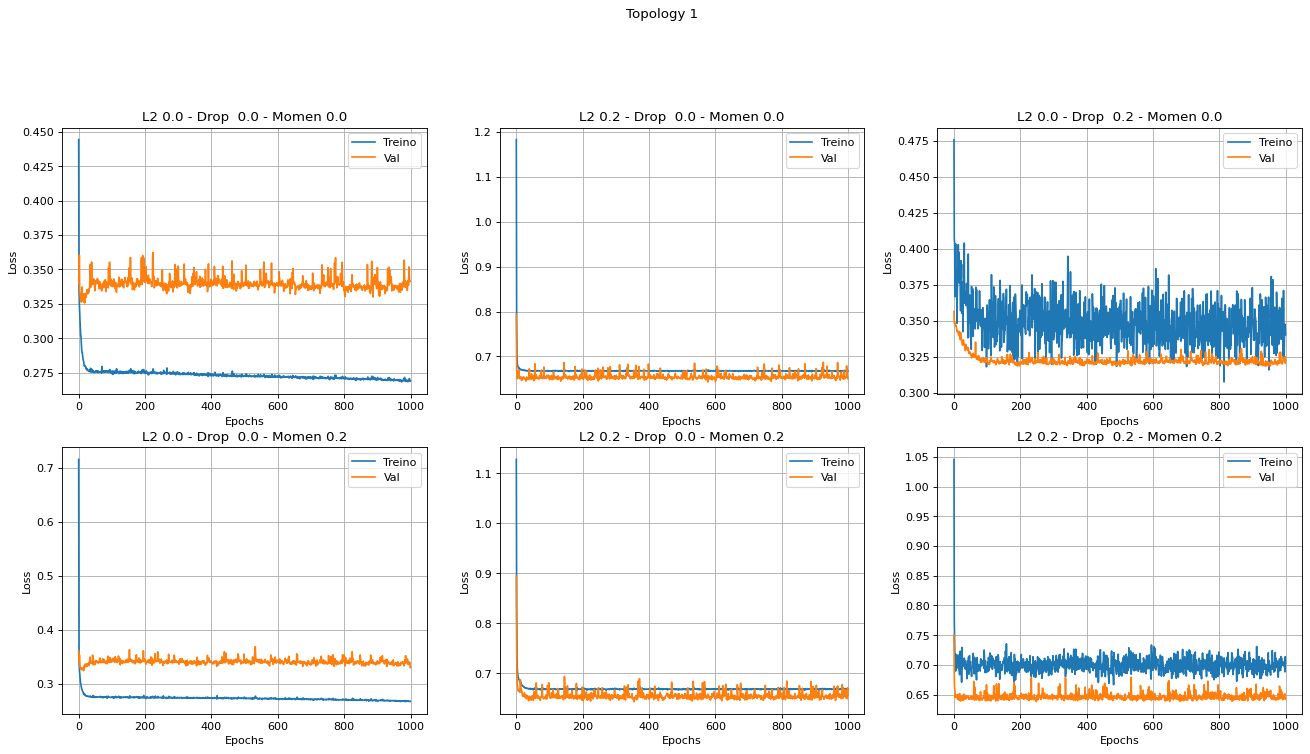

In [12]:
figure(figsize=(20,15),dpi=80)
plt.suptitle("Topology 1")
for i in range(len(model_1)):
  plt.subplot(3,3,(i+1))
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(history_1[i].history['loss'], label="Treino")
  plt.plot(history_1[i].history['val_loss'], label="Val")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
  plt.legend()

### Avaliation

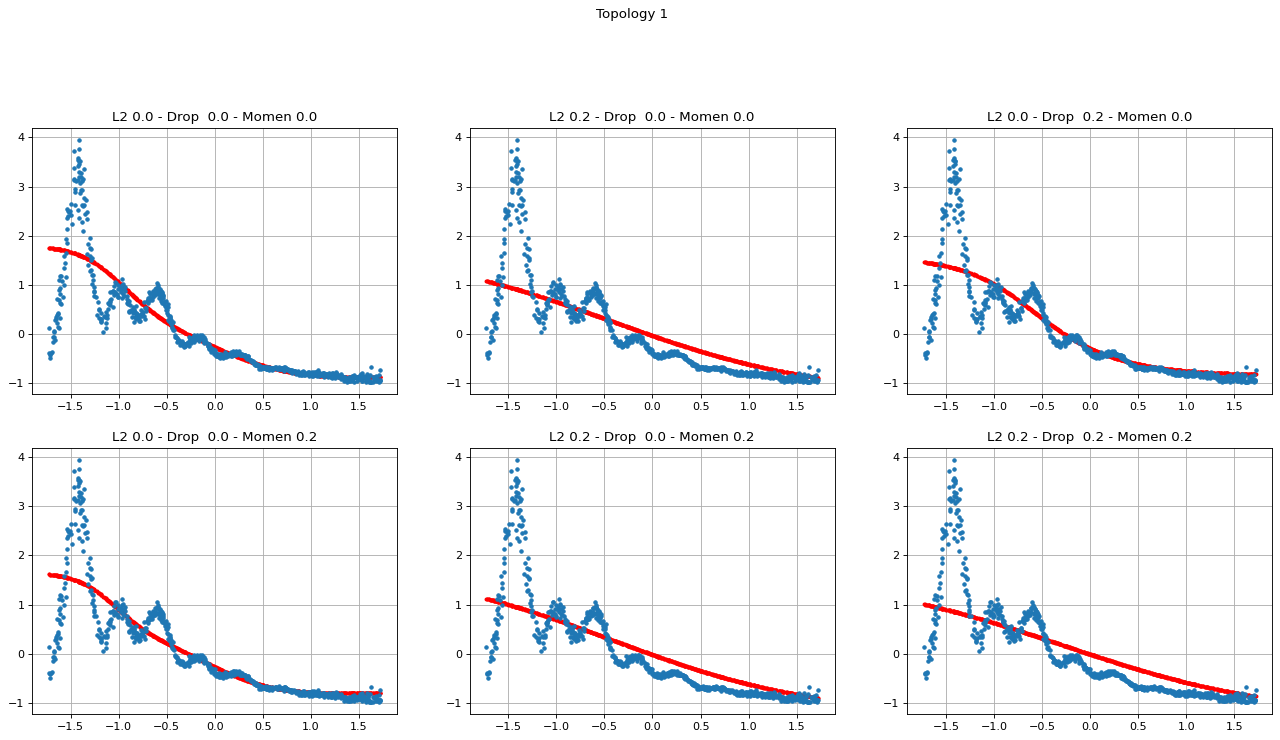

In [13]:
figure(figsize=(20,15),dpi=80)
plt.suptitle(   'Topology 1')
for i in range(len( model_1)):
  plt.subplot(3,3,(i+1))
  plt.plot(x_train, model_1[i].predict(x_train), '.', markersize=5 ,color='red')
  plt.plot(x_train, y_train, '.', color='C0')
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
#plt.xscale('log')

In [14]:
score_1 = []
for i in range(len(           model_1)): 
  score_1.append(             model_1[i].evaluate(x_test, y_test, verbose=0))
  print('Model_1'+str(i))
  print("Test loss:",   round(score_1[i][0],5))
  print("Test metric:", round(score_1[i][1],5),'\n')


Model_10
Test loss: 0.29507
Test metric: 0.28621 

Model_11
Test loss: 0.64123
Test metric: 0.37021 

Model_12
Test loss: 0.29183
Test metric: 0.29269 

Model_13
Test loss: 0.28494
Test metric: 0.2799 

Model_14
Test loss: 0.64417
Test metric: 0.37096 

Model_15
Test loss: 0.63908
Test metric: 0.38769 



## Topology 2 

1. 10 Neurons on input layer
2. 10 Neurons on 1º hidden layer
3. 10 Neurons on 2º hidden layer
4. 10 Neurons on 3º hidden layer
5. 1 Neurons on output layer

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/top2.png?raw=true">

### Models



In [15]:
model_2 = []
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]

for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_2.append(keras.Sequential())
  model_2[i].add(keras.layers.Dense(units=10,kernel_regularizer=l2(regul[i]), input_shape=[1], activation="tanh"))
  model_2[i].add(Dropout(dropo[i]))
  model_2[i].add(keras.layers.Dense(units=10,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_2[i].add(Dropout(dropo[i]))
  model_2[i].add(keras.layers.Dense(units=10,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_2[i].add(Dropout(dropo[i]))
  model_2[i].add(keras.layers.Dense(units=10,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_2[i].add(Dropout(dropo[i]))  
  model_2[i].add(keras.layers.Dense(units=1, activation="linear"))
  model_2[i].compile(loss='mean_squared_error', optimizer=sgd, metrics=["mean_absolute_error"])


### Training

In [16]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
ages = 1000
#Traing Model_11
start___2 = []
endti___2 = []
history_2 = []
for i in range(len(regul)):
  start___2.append(time.time())
  history_2.append(
    model_2[i].fit(x_train, y_train, epochs=ages, batch_size=10, validation_split=0.2, verbose=1))#, 
  endti___2.append(time.time())

A saída de streaming foi truncada nas últimas 5000 linhas.
61/61 [==============================] - 0s 4ms/step - loss: 0.0443 - mean_absolute_error: 0.1405 - val_loss: 0.0483 - val_mean_absolute_error: 0.1550
Epoch 502/1000
61/61 [==============================] - 0s 5ms/step - loss: 0.0397 - mean_absolute_error: 0.1372 - val_loss: 0.0335 - val_mean_absolute_error: 0.1207
Epoch 503/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.0398 - mean_absolute_error: 0.1359 - val_loss: 0.0303 - val_mean_absolute_error: 0.1098
Epoch 504/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.0394 - mean_absolute_error: 0.1361 - val_loss: 0.0564 - val_mean_absolute_error: 0.2004
Epoch 505/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.0407 - mean_absolute_error: 0.1394 - val_loss: 0.0344 - val_mean_absolute_error: 0.1229
Epoch 506/1000
61/61 [==============================] - 0s 5ms/step - loss: 0.0406 - mean_absolute_error: 0.1375 - val_loss: 0

### Results

In [17]:
#Time Running Out
for i in range(len(start___2)):
  print(round((    endti___2[i]- start___2[i])/60,5),'minuts')
print(round((      endti___2[-1]-start___2[0])/60,5),'minuts TOTAL')

4.38032 minuts
5.37944 minuts
4.38296 minuts
4.38461 minuts
4.45848 minuts
5.38364 minuts
28.36945 minuts TOTAL


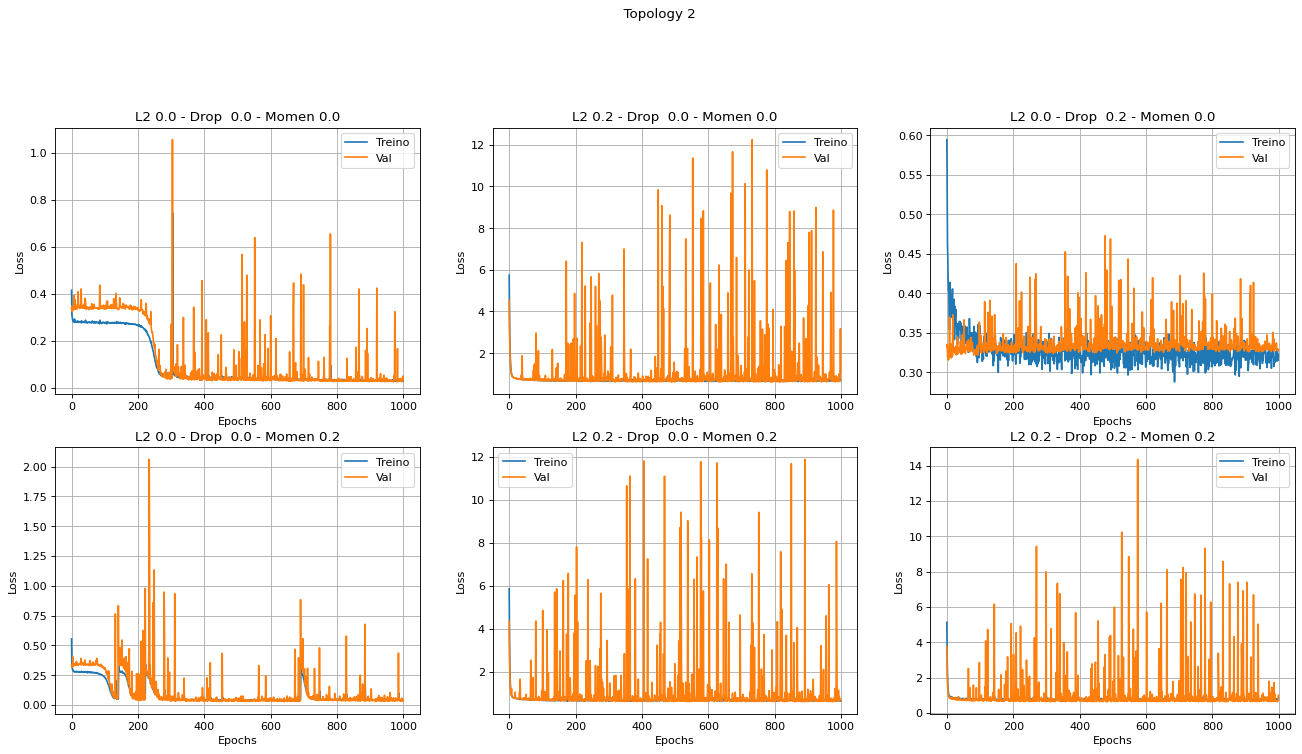

In [18]:
figure(figsize=(20,15),dpi=80)
plt.suptitle("  Topology 2")
for i in range(len(model_2)):
  plt.subplot(3,3,(i+1))
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(      history_2[i].history['loss'], label="Treino")
  plt.plot(      history_2[i].history['val_loss'], label="Val")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
  plt.legend()

### Avaliation

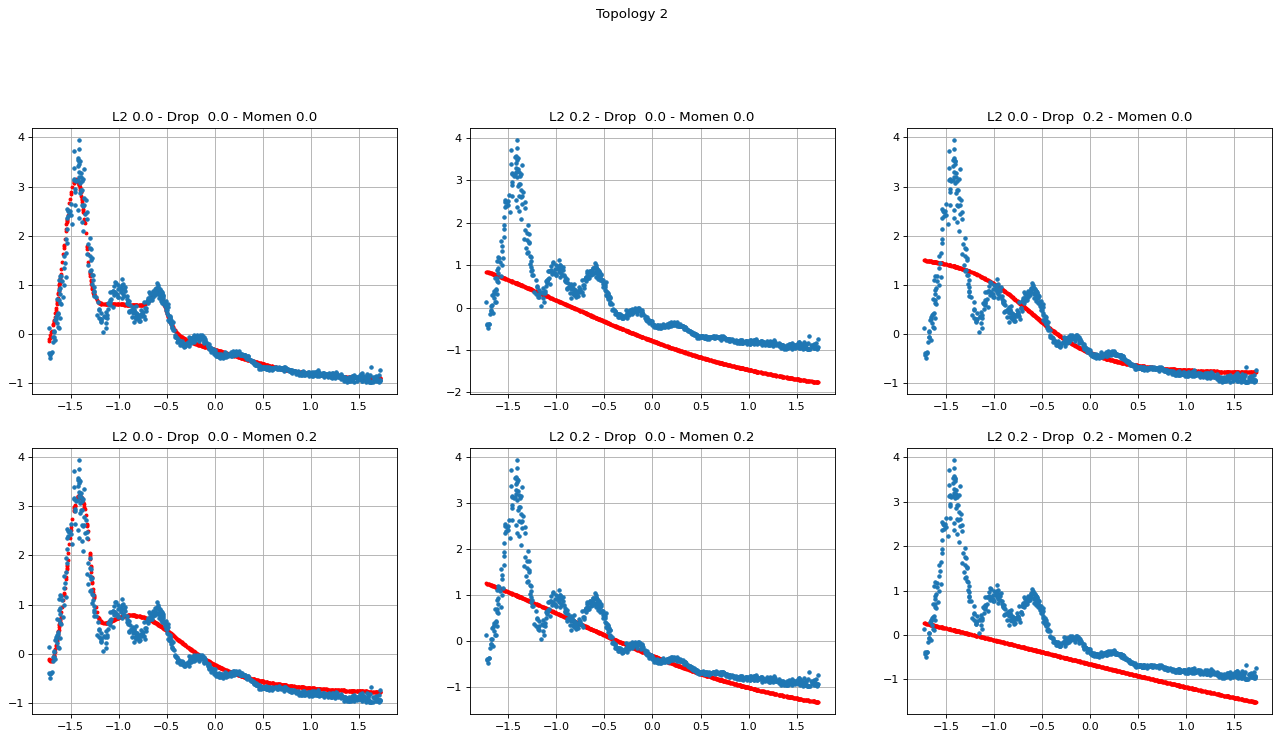

In [19]:
figure(figsize=(20,15),dpi=80)
plt.suptitle(   'Topology 2')
for i in range(len( model_2)):
  plt.subplot(3,3,(i+1))
  plt.plot(x_train, model_2[i].predict(x_train), '.', markersize=5 ,color='red')
  plt.plot(x_train, y_train, '.', color='C0')
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
#plt.xscale('log')

In [20]:
score_2 = []
for i in range(len(           model_2)): 
  score_2.append(             model_2[i].evaluate(x_test, y_test, verbose=0))
  print(                     'Model_2'+str(i))
  print("Test loss:",   round(score_2[i][0],5))
  print("Test metric:", round(score_2[i][1],5),'\n')

Model_20
Test loss: 0.03901
Test metric: 0.12163 

Model_21
Test loss: 1.03528
Test metric: 0.71137 

Model_22
Test loss: 0.29336
Test metric: 0.30155 

Model_23
Test loss: 0.05222
Test metric: 0.17347 

Model_24
Test loss: 0.64879
Test metric: 0.35569 

Model_25
Test loss: 1.05551
Test metric: 0.66031 



## Topology 3


1. 50 Neurons on input layer
2. 40 Neurons on 1º hidden layer
3. 30 Neurons on 2º hidden layer
4. 20 Neurons on 3º hidden layer
4. 10 Neurons on 4º hidden layer
5. 1 Neurons on output layer


<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/top3.png?raw=true">

### Models


In [21]:
model_3 = []
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]

for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_3.append(keras.Sequential())
  model_3[i].add(keras.layers.Dense(units=50,kernel_regularizer=l2(regul[i]), input_shape=[1], activation="tanh"))
  model_3[i].add(Dropout(dropo[i]))
  model_3[i].add(keras.layers.Dense(units=40,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_3[i].add(Dropout(dropo[i]))
  model_3[i].add(keras.layers.Dense(units=30,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_3[i].add(Dropout(dropo[i]))
  model_3[i].add(keras.layers.Dense(units=20,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_3[i].add(Dropout(dropo[i]))
  model_3[i].add(keras.layers.Dense(units=10,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_3[i].add(Dropout(dropo[i]))
  model_3[i].add(keras.layers.Dense(units=1, activation="linear"))
  model_3[i].compile(loss='mean_squared_error', optimizer=sgd, metrics=["mean_absolute_error"])


### Training

In [22]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
ages = 1000
#Traing Model_11
start___3 = []
endti___3 = []
history_3 = []
for i in range(len(regul)):
  start___3.append(time.time())
  history_3.append(model_3[i].fit(x_train, y_train, epochs=ages, batch_size=10, validation_split=0.2, verbose=1))#, 
  endti___3.append(time.time())

A saída de streaming foi truncada nas últimas 5000 linhas.
61/61 [==============================] - 0s 4ms/step - loss: 0.3069 - mean_absolute_error: 0.3429 - val_loss: 0.7829 - val_mean_absolute_error: 0.7355
Epoch 502/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.3217 - mean_absolute_error: 0.3677 - val_loss: 0.4596 - val_mean_absolute_error: 0.4968
Epoch 503/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.3009 - mean_absolute_error: 0.3326 - val_loss: 0.3857 - val_mean_absolute_error: 0.3586
Epoch 504/1000
61/61 [==============================] - 0s 5ms/step - loss: 0.3248 - mean_absolute_error: 0.3658 - val_loss: 0.4363 - val_mean_absolute_error: 0.4768
Epoch 505/1000
61/61 [==============================] - 0s 5ms/step - loss: 0.3017 - mean_absolute_error: 0.3338 - val_loss: 0.4077 - val_mean_absolute_error: 0.4229
Epoch 506/1000
61/61 [==============================] - 0s 4ms/step - loss: 0.2932 - mean_absolute_error: 0.3251 - val_loss: 0

### Results

In [23]:
#Time Running Out
for i in range(len(start___3)):
  print(round((    endti___3[i]- start___3[i])/60,5),'minuts')
print(round((      endti___3[-1]-start___3[0])/60,5),'minuts TOTAL')

5.38105 minuts
4.57961 minuts
4.61232 minuts
5.38706 minuts
5.38209 minuts
4.84267 minuts
30.1848 minuts TOTAL


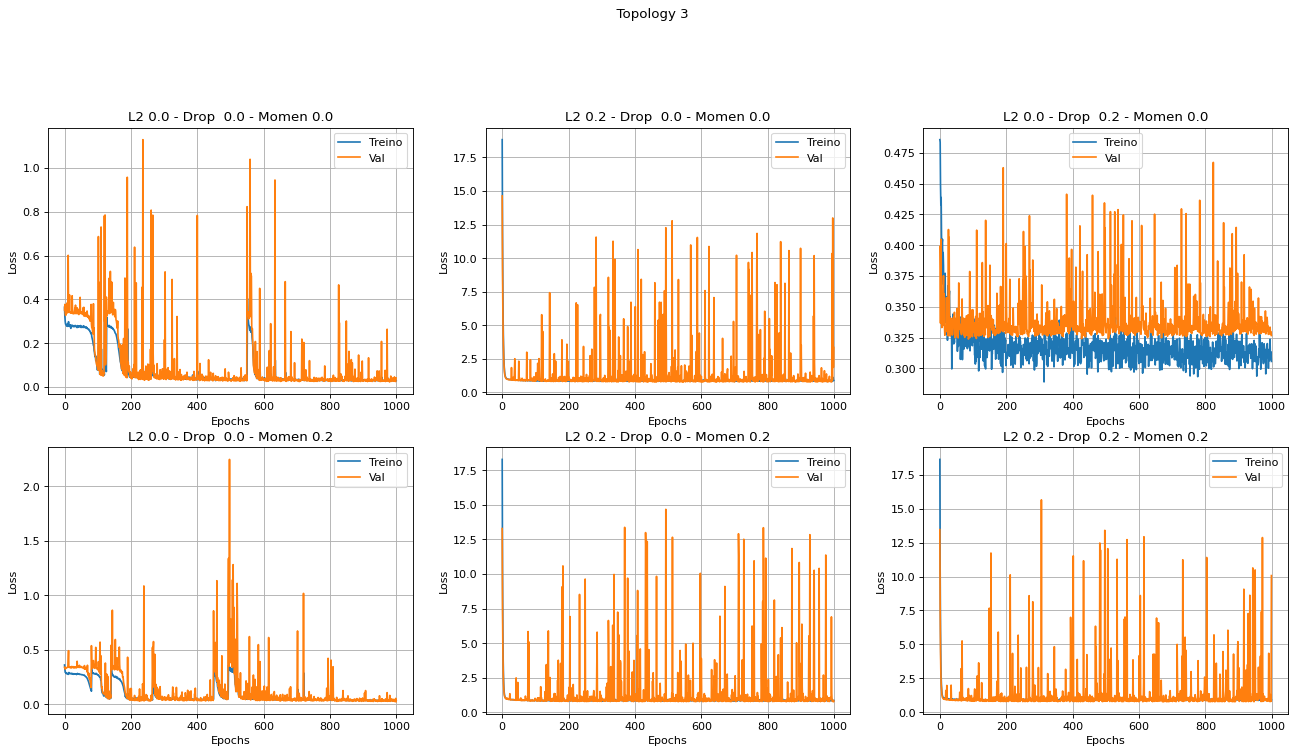

In [24]:
figure(figsize=(20,15),dpi=80)
plt.suptitle("  Topology 3")
for i in range(len(model_3)):
  plt.subplot(3,3,(i+1))
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(      history_3[i].history['loss'], label="Treino")
  plt.plot(      history_3[i].history['val_loss'], label="Val")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
  plt.legend()

### Avaliation

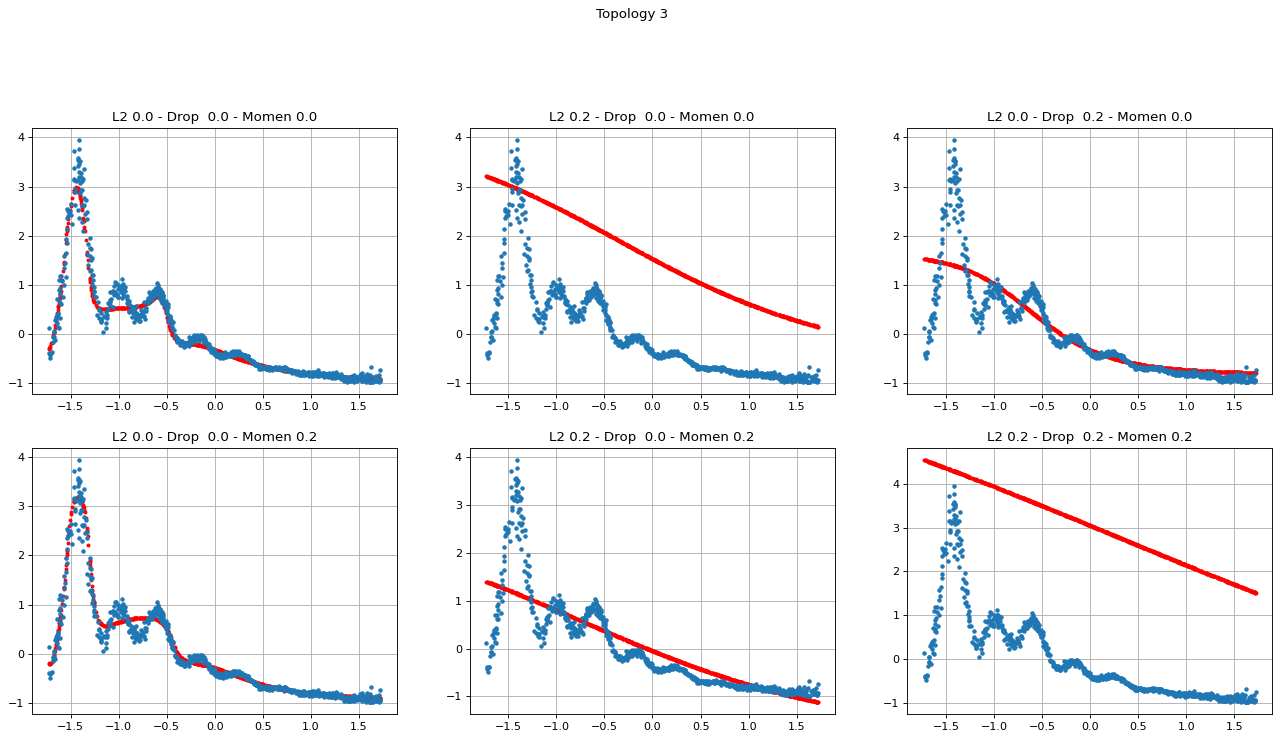

In [25]:
figure(figsize=(20,15),dpi=80)
plt.suptitle(   'Topology 3')
for i in range(len( model_3)):
  plt.subplot(3,3,(i+1))
  plt.plot(x_train, model_3[i].predict(x_train), '.', markersize=5 ,color='red')
  plt.plot(x_train, y_train, '.', color='C0')
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
#plt.xscale('log')

In [26]:
score_3 = []
for i in range(len(           model_3)): 
  score_3.append(             model_3[i].evaluate(x_test, y_test, verbose=0))
  print(                     'Model_3'+str(i))
  print("Test loss:",   round(score_3[i][0],5))
  print("Test metric:", round(score_3[i][1],5),'\n')

Model_30
Test loss: 0.042
Test metric: 0.12081 

Model_31
Test loss: 3.37336
Test metric: 1.6145 

Model_32
Test loss: 0.2927
Test metric: 0.30046 

Model_33
Test loss: 0.0322
Test metric: 0.11551 

Model_34
Test loss: 0.75765
Test metric: 0.34022 

Model_35
Test loss: 10.10721
Test metric: 3.0471 



## Topology 4 


1. 100 Neurons on input layer
2. 200 Neurons on 1º hidden layer
3. 200 Neurons on 2º hidden layer
4. 200 Neurons on 3º hidden layer
4. 100 Neurons on 4º hidden layer
4. 50 Neurons on 4º hidden layer
5. 1 Neurons on output layer

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/top4.png?raw=true">

### Models


In [27]:
#Model_4 
model_4 = []
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]

for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_4.append(keras.Sequential())
  model_4[i].add(keras.layers.Dense(units=100,kernel_regularizer=l2(regul[i]), input_shape=[1], activation="tanh"))
  model_4[i].add(Dropout(dropo[i]))
  model_4[i].add(keras.layers.Dense(units=200,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_4[i].add(Dropout(dropo[i]))
  model_4[i].add(keras.layers.Dense(units=200,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_4[i].add(Dropout(dropo[i]))
  model_4[i].add(keras.layers.Dense(units=200,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_4[i].add(Dropout(dropo[i]))
  model_4[i].add(keras.layers.Dense(units=100,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_4[i].add(Dropout(dropo[i]))
  model_4[i].add(keras.layers.Dense(units=50,kernel_regularizer=l2(regul[i]), activation="sigmoid"))
  model_4[i].add(Dropout(dropo[i]))
  model_4[i].add(keras.layers.Dense(units=1, activation="linear"))
  model_4[i].compile(loss='mean_squared_error', optimizer=sgd, metrics=["mean_absolute_error"])


### Training

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
ages = 1000
#Traing Model_11
start___4 = []
endti___4 = []
history_4 = []
for i in range(len(regul)):
  start___4.append(time.time())
  history_4.append(
    model_4[i].fit(x_train, y_train, epochs=ages, batch_size=10, validation_split=0.2, verbose=1))#, 
  endti___4.append(time.time())

Epoch 1/1000
61/61 [==============================] - 2s 12ms/step - loss: 0.4831 - mean_absolute_error: 0.4477 - val_loss: 0.3534 - val_mean_absolute_error: 0.3514
Epoch 2/1000
61/61 [==============================] - 0s 6ms/step - loss: 0.3308 - mean_absolute_error: 0.3636 - val_loss: 0.3450 - val_mean_absolute_error: 0.3363
Epoch 3/1000
61/61 [==============================] - 0s 5ms/step - loss: 0.3149 - mean_absolute_error: 0.3524 - val_loss: 0.3613 - val_mean_absolute_error: 0.3466
Epoch 4/1000
61/61 [==============================] - 0s 6ms/step - loss: 0.3095 - mean_absolute_error: 0.3316 - val_loss: 0.3537 - val_mean_absolute_error: 0.3426
Epoch 5/1000
61/61 [==============================] - 0s 6ms/step - loss: 0.3018 - mean_absolute_error: 0.3315 - val_loss: 0.3380 - val_mean_absolute_error: 0.3174
Epoch 6/1000
61/61 [==============================] - 0s 6ms/step - loss: 0.2969 - mean_absolute_error: 0.3123 - val_loss: 0.3445 - val_mean_absolute_error: 0.3020
Epoch 7/1000
61

### Results

In [ ]:
#Time Running Out
for i in range(len(start___4)):
  print(round((    endti___4[i]- start___4[i])/60,5),'minuts')
print(round((      endti___4[-1]-start___4[0])/60,5),'minuts TOTAL')

In [ ]:
figure(figsize=(20,15),dpi=80)
plt.suptitle("  Topology 4")
for i in range(len(model_4)):
  plt.subplot(3,3,(i+1))
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(      history_4[i].history['loss'], label="Treino")
  plt.plot(      history_4[i].history['val_loss'], label="Val")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
  plt.legend()

### Avaliation

In [ ]:
figure(figsize=(20,15),dpi=80)
plt.suptitle(   'Topology 4')
for i in range(len( model_4)):
  plt.subplot(3,3,(i+1))
  plt.plot(x_train, model_4[i].predict(x_train), '.', markersize=5 ,color='red')
  plt.plot(x_train, y_train, '.', color='C0')
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
#plt.xscale('log')

In [ ]:
score_4 = []
for i in range(len(           model_4)): 
  score_4.append(             model_4[i].evaluate(x_test, y_test, verbose=0))
  print(                     'Model_4'+str(i))
  print("Test loss:",   round(score_4[i][0],5))
  print("Test metric:", round(score_4[i][1],5),'\n')

## Topology 5 


1. 100 Neurons on input layer
2. 200 Neurons on 1º hidden layer
3. 200 Neurons on 2º hidden layer
4. 200 Neurons on 3º hidden layer
4. 100 Neurons on 4º hidden layer
4. 50 Neurons on 4º hidden layer
5. 1 Neurons on output layer

Same topology as Topology 4, but with diferens activations functions in the Models.

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/top4.png?raw=true">



### Models

In [ ]:
#Model_5 
model_5 = []
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]

for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_5.append(keras.Sequential())
  model_5[i].add(keras.layers.Dense(units=100,kernel_regularizer=l2(regul[i]), input_shape=[1], activation="tanh"))
  model_5[i].add(Dropout(dropo[i]))
  model_5[i].add(keras.layers.Dense(units=200,kernel_regularizer=l2(regul[i]), activation="sigmoid"))
  model_5[i].add(Dropout(dropo[i]))
  model_5[i].add(keras.layers.Dense(units=200,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_5[i].add(Dropout(dropo[i]))
  model_5[i].add(keras.layers.Dense(units=200,kernel_regularizer=l2(regul[i]), activation="sigmoid"))
  model_5[i].add(Dropout(dropo[i]))
  model_5[i].add(keras.layers.Dense(units=100,kernel_regularizer=l2(regul[i]), activation="tanh"))
  model_5[i].add(Dropout(dropo[i]))
  model_5[i].add(keras.layers.Dense(units=50,kernel_regularizer=l2(regul[i]), activation="sigmoid"))
  model_5[i].add(keras.layers.Dense(units=1, activation="linear"))
  model_5[i].compile(loss='mean_squared_error', optimizer=sgd, metrics=["mean_absolute_error"])


### Training

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
ages = 1000
#Traing Model_11
start___5 = []
endti___5 = []
history_5 = []
for i in range(len(regul)):
  start___5.append(time.time())
  history_5.append(
    model_5[i].fit(x_train, y_train, epochs=ages, batch_size=10, validation_split=0.2, verbose=0))#, 
  endti___5.append(time.time())

### Results

In [ ]:
#Time Running Out
for i in range(len(start___5)):
  print(round((    endti___5[i]- start___5[i])/60,5),'minuts')
print(round((      endti___5[-1]-start___5[0])/60,5),'minuts TOTAL')

In [ ]:
figure(figsize=(20,15),dpi=80)
plt.suptitle("  Topology 5")
for i in range(len(model_5)):
  plt.subplot(3,3,(i+1))
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(      history_5[i].history['loss'], label="Treino")
  plt.plot(      history_5[i].history['val_loss'], label="Val")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
  plt.legend()

### Avaliation

In [ ]:
figure(figsize=(20,15),dpi=80)
plt.suptitle(   'Topology 5')
for i in range(len( model_5)):
  plt.subplot(3,3,(i+1))
  plt.plot(x_train, model_5[i].predict(x_train), '.', markersize=5 ,color='red')
  plt.plot(x_train, y_train, '.', color='C0')
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.grid()
#plt.xscale('log')

In [ ]:
score_5 = []
for i in range(len(           model_5)): 
  score_5.append(             model_5[i].evaluate(x_test, y_test, verbose=0))
  print(                     'Model_5'+str(i))
  print("Test loss:",   round(score_5[i][0],5))
  print("Test metric:", round(score_5[i][1],5),'\n')

## General Discution

The classification problem consists of finding the value of $y$ for a given value of $x$. A single-layer perceptron with a single neuron is simply a linear discriminator. As new neurons and hidden layers are added, the system begins to gain a higher level of complexity. In this way, the "dropout" "momentum" and "regularization" functions end up being essential.


Therefore, the values tested give very strong weight to learning, in particular regularization. An ideal parameter exploration would be to initially vary the weights in the order of magnitude and then seek an upper and lower bound for a sensitivity debate. However, for a first analysis, it is noticeable how these hypermeters impact the results by looking at the graphs.



# Classification

Tha classification problem in Machine Learning consist in separete a group of information belonging to a certain class. Mathematically speeking, create a hyperplan how will spreed a conjunt of data. 

A classical problem is the Titanic classification were, with certain information about gender, age, and outher features we will know if a passeger survided or not to the accident. 

Another classic problem is Cat & Dog Classification, where the Neural Network will learn what the images look like and classify which animal that image belongs to.

<img src="https://it.mathworks.com/matlabcentral/mlc-downloads/downloads/aa0a08f6-e2bb-422b-8e89-4c9204fe8424/d133b739-c9b8-45e0-8285-e8fc72f5b2f8/images/screenshot.gif" width = 400>

font https://it.mathworks.com/matlabcentral/fileexchange/74442-visualizing-a-hyper-plane-in-svm-classifier-svm 

For this Classification problem a follow two tutoriais. 

https://www.kaggle.com/code/pedrovinciusmeerholz/nearest-earth-objects-three-models-acc-90

and 

https://www.kaggle.com/code/renangomes/solu-o-simplificada-utilizando-mlp-pt-br/notebook

## Dataset

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/nasa_neo.png?raw=true">

###NASA - Nearest Earth Objects
*A cumulative data for Nearest Earth Objects by NASA* 

"There is an infinite number of objects in the outer space. Some of them are closer than we think. Even though we might think that a distance of 70,000 Km can not potentially harm us, but at an astronomical scale, this is a very small distance and can disrupt many natural phenomena. These objects/asteroids can thus prove to be harmful. Hence, it is wise to know what is surrounding us and what can harm us amongst those. Thus, this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object."

This dataset was made available on Kaggle in June 2022 (one month ago) and its features are `id`, `Name`,`st_diameter_min`, `st_diameter_max`, `relative_velocity`, `miss_distance`, `orbiting_body`, `sentry_object` `bsolute_magnitude` and `hazardous`. This last one info if the data are or not dangerous.

The aim of this work is to build several MLC Architectures to classify is a certain object is dangerous or not. 



https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects




In [ ]:
#Importing Librarys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from keras.models import Sequential
from keras.layers import Activation, Dense
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
import time


#### Kagle Direcy Donwload

In [ ]:
#Monting Google Drive
# https://medium.com/analytics-vidhya/how-to-download-kaggle-datasets-into-google-colab-via-google-drive-dcb348d7af07
from google.colab import drive
drive.mount('/content/drive')
#Importing and conifg the Kaggle Drive
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# Acessing the folder
%cd /content/drive/MyDrive/Kaggle/
# Dowloading NASA data-set
!kaggle datasets download -d sameepvani/nasa-nearest-earth-objects
#Unziping data-set
!unzip "nasa-nearest-earth-objects.zip" -d "/content/"

In [ ]:
#Retorning to Sample folder! NOT NECESSERY
%cd ..
%cd ..
%cd ..

In [ ]:
df_nasa.columns

In [ ]:
df_nasa = pd.read_csv('neo.csv')
df_nasa.head()


###  Pre-Processing data

In this point I will take ony the ~columsns~ features usefull for the classification. 

In [ ]:
features = df_nasa.drop(['id', 'name', 'orbiting_body', 'sentry_object'], axis=1)
features.head()

In [ ]:
# Correlation Betwenn data
plt.figure(figsize = (5, 4),dpi=80)
plt.title('Correlation of Features')
sns.heatmap(features.astype(float).corr(), linewidths = 0.1, linecolor = 'white', cmap="Greens")
plt.show()

In [ ]:
#Defining the feature how will be our classify 🎯
targets = features['hazardous']
features = features.drop('hazardous', axis=1)
targets.value_counts()

In [ ]:
#Normalize data
scaler = MinMaxScaler() 
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
#features.head()

In [ ]:
## Split in Traing and Test
x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=42, test_size=0.3)
#x_train.shape, y_train.shape, x_test.shape, y_test.shape

## Topology NASA 1 

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/top_NASA_1.png?raw=true">

### Models

For this first case, the topology will be chosen based on the number of different input features and a single output neuron. The topology being:

1. 5 neurons in the input layer
2. 1 neuron in the output layer

In [ ]:
# Model definition
#x_train, x_test, y_train, y_test
#i = 0
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]
model_NASA_1 = []
for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_NASA_1.append(Sequential())
  model_NASA_1[i].add(Dense(5, input_dim=x_train.shape[1], kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_1[i].add(Dropout(dropo[i]))
  model_NASA_1[i].add(Dense(1, activation='sigmoid'))
  model_NASA_1[i].compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.summary()

### Training

In [ ]:
epochs = 100
en_time_NASA_1 = []
st_time_NASA_1 = []
history_NASA_1 = []
for i in range(len(regul)):
  st_time_NASA_1.append(time.time())
  history_NASA_1.append(
    model_NASA_1[i].fit(x_train.values, y_train.values, epochs=epochs, batch_size=32,
                      validation_data=(x_test.values,  y_test.values), verbose=0, shuffle=True))
  en_time_NASA_1.append(time.time())

### Results 

In [ ]:
for i in range(len(regul)):
  print('Model NASA 1'+str(i+1))
  print(        round((en_time_NASA_1[i] - st_time_NASA_1[i])/60,4), "minutes\n")
print('TOTAL\n',round((en_time_NASA_1[-1]- st_time_NASA_1[0])/60,4), "minutes TOTAL")  

In [ ]:
N_rows, N_colluns = 6,2

figure(figsize=(18,30),dpi=80)
plt.suptitle("Topology NASA 1")
for i in range(len(regul)):
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.plot(    history_NASA_1[i].history['accuracy'], color="C0")
  plt.plot(    history_NASA_1[i].history['val_accuracy'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['accuracy', 'Validation'], loc='lower right')
  plt.grid()

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.plot(    history_NASA_1[i].history['loss'], color="C0")
  plt.plot(    history_NASA_1[i].history['val_loss'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.grid()
plt.show()

### Metrics

In [ ]:
for i in range(len(regul)):
  print('Model_NASA_1'+str(i+1))
  print('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  print("Training dataset")
  print("Accuracy :",round(accuracy_score(y_train.values, np.round(model_NASA_1[i].predict(x_train.values))),6),
      "\nF1_score :",round(      f1_score(y_train.values, np.round(model_NASA_1[i].predict(x_train.values))),6), 
      "\nRecall   :",round(  recall_score(y_train.values, np.round(model_NASA_1[i].predict(x_train.values))),6),
      "\nValidation dataset",
      "\nAccuracy :",round(accuracy_score(y_test.values,  np.round(model_NASA_1[i].predict(x_test.values))),6), "\r")
  print("F1_score :",round(      f1_score(y_test.values,  np.round(model_NASA_1[i].predict(x_test.values))),6), "\r")
  print("Recall   :",round(  recall_score(y_test.values,  np.round(model_NASA_1[i].predict(x_test.values))),6), "\r\n")


In [ ]:
#Confusion Matrix
N_rows, N_colluns = 6,2

#figure(figsize=(18,20),dpi=80)
plt.suptitle('Topology NASA 1')
for i in range(len(regul)):
  figure(figsize=(18,20),dpi=80)
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.title('Training = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_train.values, np.round(model_NASA_1[i].predict(x_train.values))),index=('Positive', 'Negative'),columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.title('Test = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i]))
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_test.values, np.round(model_NASA_1[i].predict(x_test.values))),
                                  index=('Positive', 'Negative'), 
                                  columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

## Topology NASA 2 

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/top_NASA_2.png?raw=true">

### Models

For this first case, the topology will be chosen based on the number of different input features and a single output neuron. The topology being:

1. 5 neurons in the input layer
2. 1 neuron in the output layer

In [ ]:
# Model definition
#x_train, x_test, y_train, y_test
#i = 0
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]
model_NASA_2 = []
for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_NASA_2.append(Sequential())
  model_NASA_2[i].add(Dense(5, input_dim=x_train.shape[1], kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_2[i].add(Dropout(dropo[i]))
  model_NASA_2[i].add(Dense(5, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_2[i].add(Dropout(dropo[i]))
  model_NASA_2[i].add(Dense(5, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_2[i].add(Dropout(dropo[i]))
  model_NASA_2[i].add(Dense(5, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_2[i].add(Dropout(dropo[i]))
  model_NASA_2[i].add(Dense(1, activation='sigmoid'))
  model_NASA_2[i].compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.summary()

### Training

In [ ]:
epochs = 100
en_time_NASA_2 = []
st_time_NASA_2 = []
history_NASA_2 = []
for i in range(len(regul)):
  st_time_NASA_2.append(time.time())
  history_NASA_2.append(
    model_NASA_2[i].fit(x_train.values, y_train.values, epochs=epochs, batch_size=32,
                      validation_data=(x_test.values,  y_test.values), verbose=0, shuffle=True))
  en_time_NASA_2.append(time.time())

### Results 

In [ ]:
for i in range(len(regul)):
  print('Model NASA 1'+str(i+1))
  print(        round((en_time_NASA_2[i] - st_time_NASA_2[i])/60,4), "minutes\n")
print('TOTAL\n',round((en_time_NASA_2[-1]- st_time_NASA_2[0])/60,4), "minutes TOTAL")  

In [ ]:
N_rows, N_colluns = 6,2

figure(figsize=(18,30),dpi=80)
plt.suptitle("Topology NASA 1")
for i in range(len(regul)):
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.plot(    history_NASA_2[i].history['accuracy'], color="C0")
  plt.plot(    history_NASA_2[i].history['val_accuracy'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['accuracy', 'Validation'], loc='lower right')

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.plot(    history_NASA_2[i].history['loss'], color="C0")
  plt.plot(    history_NASA_2[i].history['val_loss'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

### Metrics

In [ ]:
for i in range(len(regul)):
  print('Model_NASA_2'+str(i+1))
  print('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  print("Training dataset")
  print("Accuracy :",round(accuracy_score(y_train.values, np.round(model_NASA_2[i].predict(x_train.values))),6),
      "\nF1_score :",round(      f1_score(y_train.values, np.round(model_NASA_2[i].predict(x_train.values))),6), 
      "\nRecall   :",round(  recall_score(y_train.values, np.round(model_NASA_2[i].predict(x_train.values))),6),
      "\nValidation dataset",
      "\nAccuracy :",round(accuracy_score(y_test.values,  np.round(model_NASA_2[i].predict(x_test.values))),6), "\r")
  print("F1_score :",round(      f1_score(y_test.values,  np.round(model_NASA_2[i].predict(x_test.values))),6), "\r")
  print("Recall   :",round(  recall_score(y_test.values,  np.round(model_NASA_2[i].predict(x_test.values))),6), "\r\n")


In [ ]:
#Confusion Matrix
N_rows, N_colluns = 6,2

#figure(figsize=(18,20),dpi=80)
plt.suptitle('Topology NASA 2')
for i in range(len(regul)):
  figure(figsize=(18,20),dpi=80)
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.title('Training = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_train.values, np.round(model_NASA_2[i].predict(x_train.values))),index=('Positive', 'Negative'),columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.title('Test = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i]))
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_test.values, np.round(model_NASA_2[i].predict(x_test.values))),
                                  index=('Positive', 'Negative'), 
                                  columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

## Topology NASA 3 

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/top_NASA_3.png?raw=true">

### Models

For this first case, the topology will be chosen based on the number of different input features and a single output neuron. The topology being:

1. 5 neurons in the input layer
2. 1 neuron in the output layer

In [ ]:
# Model definition
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]
model_NASA_3 = []
for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_NASA_3.append(Sequential())
  model_NASA_3[i].add(Dense(5, input_dim=x_train.shape[1], kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_3[i].add(Dropout(dropo[i]))
  model_NASA_3[i].add(Dense(10, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_3[i].add(Dropout(dropo[i]))
  model_NASA_3[i].add(Dense(10, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_3[i].add(Dropout(dropo[i]))
  model_NASA_3[i].add(Dense(5, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_3[i].add(Dropout(dropo[i]))
  model_NASA_3[i].add(Dense(1, activation='sigmoid'))
  model_NASA_3[i].compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.summary()

### Training

In [ ]:
epochs = 100
en_time_NASA_3 = []
st_time_NASA_3 = []
history_NASA_3 = []
for i in range(len(regul)):
  st_time_NASA_3.append(time.time())
  history_NASA_3.append(
    model_NASA_3[i].fit(x_train.values, y_train.values, epochs=epochs, batch_size=32,
                      validation_data=(x_test.values,  y_test.values), verbose=0, shuffle=True))
  en_time_NASA_3.append(time.time())

### Results 

In [ ]:
for i in range(len(regul)):
  print('Model NASA 1'+str(i+1))
  print(        round((en_time_NASA_3[i] - st_time_NASA_3[i])/60,4), "minutes\n")
print('TOTAL\n',round((en_time_NASA_3[-1]-  st_time_NASA_3[0])/60,4), "minutes TOTAL")  

In [ ]:
N_rows, N_colluns = 6,2

figure(figsize=(18,30),dpi=80)
plt.suptitle("Topology NASA 1")
for i in range(len(regul)):
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.plot(    history_NASA_3[i].history['accuracy'], color="C0")
  plt.plot(    history_NASA_3[i].history['val_accuracy'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['accuracy', 'Validation'], loc='lower right')
  plt.grid()

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.plot(    history_NASA_3[i].history['loss'], color="C0")
  plt.plot(    history_NASA_3[i].history['val_loss'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.grid()
plt.show()

### Metrics

In [ ]:
for i in range(len(regul)):
  print('Model_NASA_3'+str(i+1))
  print('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  print("Training dataset")
  print("Accuracy :",round(accuracy_score(y_train.values, np.round(model_NASA_3[i].predict(x_train.values))),6),
      "\nF1_score :",round(      f1_score(y_train.values, np.round(model_NASA_3[i].predict(x_train.values))),6), 
      "\nRecall   :",round(  recall_score(y_train.values, np.round(model_NASA_3[i].predict(x_train.values))),6),
      "\nValidation dataset",
      "\nAccuracy :",round(accuracy_score(y_test.values,  np.round(model_NASA_3[i].predict(x_test.values))),6), "\r")
  print("F1_score :",round(      f1_score(y_test.values,  np.round(model_NASA_3[i].predict(x_test.values))),6), "\r")
  print("Recall   :",round(  recall_score(y_test.values,  np.round(model_NASA_3[i].predict(x_test.values))),6), "\r\n")


In [ ]:
#Confusion Matrix
N_rows, N_colluns = 6,2

#figure(figsize=(18,20),dpi=80)
plt.suptitle('')
for i in range(len(regul)):
  figure(figsize=(18,20),dpi=80)
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.title('Training = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_train.values, np.round(model_NASA_3[i].predict(x_train.values))),index=('Positive', 'Negative'),columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.title('Test = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i]))
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_test.values, np.round(model_NASA_3[i].predict(x_test.values))),
                                  index=('Positive', 'Negative'), 
                                  columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

## Topology NASA 4

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/top_NASA_4.png?raw=true">

### Models

For this first case, the topology will be chosen based on the number of different input features and a single output neuron. The topology being:

1. 5 neurons in the input layer
2. 1 neuron in the output layer

In [ ]:
# Model definition
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]
model_NASA_4 = []
for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_NASA_4.append(Sequential())
  model_NASA_4[i].add(Dense(5, input_dim=x_train.shape[1], kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_4[i].add(Dropout(dropo[i]))
  model_NASA_4[i].add(Dense(50, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_4[i].add(Dropout(dropo[i]))
  model_NASA_4[i].add(Dense(100, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_4[i].add(Dropout(dropo[i]))
  model_NASA_4[i].add(Dense(100, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_4[i].add(Dropout(dropo[i]))
  model_NASA_4[i].add(Dense(50, kernel_regularizer=l2(regul[i]),activation='relu'))
  model_NASA_4[i].add(Dropout(dropo[i]))
  model_NASA_4[i].add(Dense(1, activation='sigmoid'))
  model_NASA_4[i].compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.summary()

### Training

In [ ]:
epochs = 100
en_time_NASA_4 = []
st_time_NASA_4 = []
history_NASA_4 = []
for i in range(len(regul)):
  st_time_NASA_4.append(time.time())
  history_NASA_4.append(
    model_NASA_4[i].fit(x_train.values, y_train.values, epochs=epochs, batch_size=32,
                      validation_data=(x_test.values,  y_test.values), verbose=0, shuffle=True))
  en_time_NASA_4.append(time.time())

### Results 

In [ ]:
for i in range(len(regul)):
  print('Model NASA 1'+str(i+1))
  print(        round((en_time_NASA_4[i] - st_time_NASA_4[i])/60,4), "minutes\n")
print('TOTAL\n',round((en_time_NASA_4[-1]-  st_time_NASA_4[0])/60,4), "minutes TOTAL")  

In [ ]:
N_rows, N_colluns = 6,2

figure(figsize=(18,30),dpi=80)
plt.suptitle("Topology NASA 4")
for i in range(len(regul)):
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.plot(    history_NASA_4[i].history['accuracy'], color="C0")
  plt.plot(    history_NASA_4[i].history['val_accuracy'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['accuracy', 'Validation'], loc='lower right')
  plt.grid()

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.plot(    history_NASA_4[i].history['loss'], color="C0")
  plt.plot(    history_NASA_4[i].history['val_loss'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.grid()
plt.show()

### Metrics

In [ ]:
for i in range(len(regul)):
  print('Model_NASA_4'+str(i+1))
  print('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  print("Training dataset")
  print("Accuracy :",round(accuracy_score(y_train.values, np.round(model_NASA_4[i].predict(x_train.values))),6),
      "\nF1_score :",round(      f1_score(y_train.values, np.round(model_NASA_4[i].predict(x_train.values))),6), 
      "\nRecall   :",round(  recall_score(y_train.values, np.round(model_NASA_4[i].predict(x_train.values))),6),
      "\nValidation dataset",
      "\nAccuracy :",round(accuracy_score(y_test.values,  np.round(model_NASA_4[i].predict(x_test.values))),6), "\r")
  print("F1_score :",round(      f1_score(y_test.values,  np.round(model_NASA_4[i].predict(x_test.values))),6), "\r")
  print("Recall   :",round(  recall_score(y_test.values,  np.round(model_NASA_4[i].predict(x_test.values))),6), "\r\n")


In [ ]:
#Confusion Matrix
N_rows, N_colluns = 6,2

#figure(figsize=(18,20),dpi=80)
plt.suptitle('')
for i in range(len(regul)):
  figure(figsize=(18,20),dpi=80)
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.title('Training = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_train.values, np.round(model_NASA_4[i].predict(x_train.values))),index=('Positive', 'Negative'),columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.title('Test = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i]))
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_test.values, np.round(model_NASA_4[i].predict(x_test.values))),
                                  index=('Positive', 'Negative'), 
                                  columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

## Topology NASA 5

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/top_NASA_4.png?raw=true">

### Models

For this first case, the topology will be chosen based on the number of different input features and a single output neuron. The topology being:

1. 5 neurons in the input layer
2. 1 neuron in the output layer

In [ ]:
# Model definition
regul = [0.0,0.2,0.0,0.0,0.2,0.2]
dropo = [0.0,0.0,0.2,0.0,0.0,0.2]
moment= [0.0,0.0,0.0,0.2,0.2,0.2]
model_NASA_5 = []
for i in range(len(regul)):
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=moment[i])
  model_NASA_5.append(Sequential())
  model_NASA_5[i].add(Dense(5, input_dim=x_train.shape[1], kernel_regularizer=l2(regul[i]),activation='sigmoid'))
  model_NASA_5[i].add(Dropout(dropo[i]))
  model_NASA_5[i].add(Dense(50, kernel_regularizer=l2(regul[i]),activation='sigmoid'))
  model_NASA_5[i].add(Dropout(dropo[i]))
  model_NASA_5[i].add(Dense(100, kernel_regularizer=l2(regul[i]),activation='sigmoid'))
  model_NASA_5[i].add(Dropout(dropo[i]))
  model_NASA_5[i].add(Dense(100, kernel_regularizer=l2(regul[i]),activation='sigmoid'))
  model_NASA_5[i].add(Dropout(dropo[i]))
  model_NASA_5[i].add(Dense(50, kernel_regularizer=l2(regul[i]),activation='sigmoid'))
  model_NASA_5[i].add(Dropout(dropo[i]))
  model_NASA_5[i].add(Dense(1, activation='sigmoid'))
  model_NASA_5[i].compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.summary()

### Training

In [ ]:
epochs = 100
en_time_NASA_5 = []
st_time_NASA_5 = []
history_NASA_5 = []
for i in range(len(regul)):
  st_time_NASA_5.append(time.time())
  history_NASA_5.append(
    model_NASA_5[i].fit(x_train.values, y_train.values, epochs=epochs, batch_size=32,
                      validation_data=(x_test.values,  y_test.values), verbose=0, shuffle=True))
  en_time_NASA_5.append(time.time())

### Results 

In [ ]:
for i in range(len(regul)):
  print('Model NASA 1'+str(i+1))
  print(        round((en_time_NASA_5[i] - st_time_NASA_3[i])/60,4), "minutes\n")
print('TOTAL\n',round((en_time_NASA_5[-1]-  st_time_NASA_3[0])/60,4), "minutes TOTAL")  

In [ ]:
N_rows, N_colluns = 6,2

figure(figsize=(18,30),dpi=80)
plt.suptitle("Topology NASA 5")
for i in range(len(regul)):
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.plot(    history_NASA_5[i].history['accuracy'], color="C0")
  plt.plot(    history_NASA_5[i].history['val_accuracy'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['accuracy', 'Validation'], loc='lower right')
  plt.grid()

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.plot(    history_NASA_5[i].history['loss'], color="C0")
  plt.plot(    history_NASA_5[i].history['val_loss'], color="C1")
  plt.title('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.grid()
plt.show()

### Metrics

In [ ]:
for i in range(len(regul)):
  print('Model_NASA_5'+str(i+1))
  print('L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  print("Training dataset")
  print("Accuracy :",round(accuracy_score(y_train.values, np.round(model_NASA_5[i].predict(x_train.values))),6),
      "\nF1_score :",round(      f1_score(y_train.values, np.round(model_NASA_5[i].predict(x_train.values))),6), 
      "\nRecall   :",round(  recall_score(y_train.values, np.round(model_NASA_5[i].predict(x_train.values))),6),
      "\nValidation dataset",
      "\nAccuracy :",round(accuracy_score(y_test.values,  np.round(model_NASA_5[i].predict(x_test.values))),6), "\r")
  print("F1_score :",round(      f1_score(y_test.values,  np.round(model_NASA_5[i].predict(x_test.values))),6), "\r")
  print("Recall   :",round(  recall_score(y_test.values,  np.round(model_NASA_5[i].predict(x_test.values))),6), "\r\n")


In [ ]:
#Confusion Matrix
N_rows, N_colluns = 6,2

#figure(figsize=(18,20),dpi=80)
plt.suptitle("Topology NASA 5")
for i in range(len(regul)):
  figure(figsize=(18,20),dpi=80)
  plt.subplot(N_rows,N_colluns,((2*i+1)))
  plt.title('Training = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i])+'')
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_train.values, np.round(model_NASA_5[i].predict(x_train.values))),index=('Positive', 'Negative'),columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.subplot(N_rows,N_colluns,((2*i+2)))
  plt.title('Test = L2 '+str(regul[i])+' - Drop  '+str(dropo[i])+' - Momen '+str(moment[i]))
  confusionMatrixDF = pd.DataFrame(confusion_matrix(y_test.values, np.round(model_NASA_5[i].predict(x_test.values))),
                                  index=('Positive', 'Negative'), 
                                  columns=('Positive', 'Negative'))
  heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')#, fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')#, fontsize=14)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

## General Discuttion 

The Aims of this results is the same we had on the last section. The main problem here is a classification problem but

# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)

http://alexlenail.me/NN-SVG/index.html

https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d

https://medium.com/analytics-vidhya/how-to-download-kaggle-datasets-into-google-colab-via-google-drive-dcb348d7af07

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/